### Question1 : KNN algorithm on Iris dataSet

In [322]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt

#### Read and Visualise the data

In [323]:
df=pd.read_csv("Data/Iris/Iris.csv",names=['sepalLen','sepalWid','petalLen','petalWid','class'])
df.head()

,sepalLen,sepalWid,petalLen,petalWid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,6.3,3.3,6.0,2.5,Iris-virginica
2,5.0,3.0,1.6,0.2,Iris-setosa
3,6.2,2.8,4.8,1.8,Iris-virginica
4,6.4,3.1,5.5,1.8,Iris-virginica


In [324]:
df["class"].value_counts()

Iris-versicolor    46
Iris-virginica     45
Iris-setosa        44
Name: class, dtype: int64

### Data Visualisation

<Figure size 432x288 with 0 Axes>

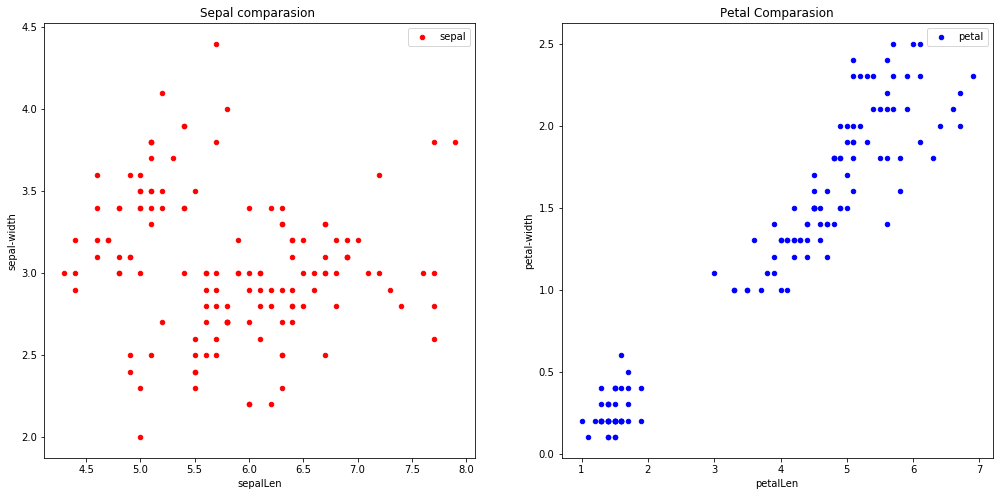

In [325]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(17, 8))
df.plot(x="sepalLen",y="sepalWid",kind="scatter",ax=ax[0],sharex=False,sharey=False,label="sepal",color='r')
df.plot(x="petalLen",y="petalWid",kind="scatter",ax=ax[1],sharex=False,sharey=False,label="petal",color='b')
ax[0].set(title='Sepal comparasion ', ylabel='sepal-width')
ax[1].set(title='Petal Comparasion',  ylabel='petal-width')
ax[0].legend()
ax[1].legend()

#### Spliting the data into training sets and testset

In [326]:
split = int(0.8 * df.shape[0])
training_data = df[:split] # 80% of the total data
testing_data = df[split:]  # 20% of the total data

#### Euclidean Distance
>   distance= ${\sqrt{\sum_{i=0}^{N} ({x_i-y_i})^2 }}$ 

In [327]:
#vectorised Implementation 
def eucli_dist(point1,point2,length):
    point2=point2[0:length]# to remove the last column string
    point1=point1[0:length]
    a1=np.array(point1)
    a2=np.array(point2)
    return np.asscalar(np.sqrt(sum(np.square(a1-a2))))

#### Cosine Similarity
> ${cos(\pmb x, \pmb y)}$ = ${\frac {\pmb x \cdot \pmb y}{||\pmb x|| \cdot ||\pmb y||}}$

In [328]:
def cosine_distance(point1,point2,length):
    point2=point2[0:length]# to remove the last column string
    point1=point1[0:length]
    a1=np.array(point1)
    a2=np.array(point2)
    
    return 1-np.dot(a1, a2) / (np.sqrt(np.dot(a1, a1)) * np.sqrt(np.dot(a2, a2)))

#### Chebychev Distance
>  distance=  ${\max_{i=1}^{N}}$ ${\left|{x_i}-{y_i}\right|}$

In [329]:
def Chebychev(point1,point2,length):
    point2=point2[0:length]# to remove the last column string
    point1=point1[0:length]
    a1=np.array(point1)
    a2=np.array(point2)
    
    return max(abs(a1-a2))

#### Manhatten Distance
>    d= ${\sum_{i=1}^{N}{\left|{x_i}-{y_i}\right|}}$ 

In [330]:
def manhatten(point1,point2,length):
    point2=point2[0:length]# to remove the last column string
    point1=point1[0:length]
    a1=np.array(point1)
    a2=np.array(point2)
    return np.sum(abs(a1-a2))

In [331]:
def KNN(training_data,test, k,distancebygiven):
    length = training_data.shape[1] - 1
    help = []
    votes = {}
    for j in range(training_data.shape[0]):
        train_data = list(training_data.iloc[j])
            
        dist = distancebygiven(test, train_data, length)
        help.append((train_data, dist))
            
    help.sort(key=operator.itemgetter(1))
    K_listNeighb = []

    for i in range(0, k):
        K_listNeighb.append(help[i][0])
        

    for i in range(0, len(K_listNeighb)):
        val = K_listNeighb[i][-1] 
        
        if val in votes:
            votes[val] += 1
        else:
            votes[val] = 1
            
    final_sort = sorted(votes.items(), key=operator.itemgetter(1), reverse = True )
    return final_sort[0][0]
  

K${\le}$ ${\sqrt{m}}$

m: no. of training examples


In [332]:
value = [] 
def prediction(training_data,testing_data,k,distanceGiven):
    
    accuracy=0.0
    
    right=0
    wrong=0
    
    for i in range(0,testing_data.shape[0]):
        inst = list(testing_data.iloc[i])
        actualAns = inst[-1]
        val = KNN(training_data,inst, k,distanceGiven)
        
        if actualAns == val:
            right+=1
        else:
            wrong+=1
            
    accuracy = (right)/(right+wrong)*100
    
    value.append(accuracy)
    print("K = ",k," Accuracy ",accuracy,"%")
    



    


In [333]:
value=[]
def predictionForTestFile(training_data,testing_data,k,distanceGiven):
    for i in range(0,testing_data.shape[0]):
        inst = list(testing_data.iloc[i])
        actualAns = inst[-1]
        val = KNN(training_data,inst, k,distanceGiven)
        value.append(val)

##### a) Euclidean distance

K =  1  Accuracy  96.29629629629629 %
K =  3  Accuracy  96.29629629629629 %
K =  5  Accuracy  96.29629629629629 %
K =  7  Accuracy  96.29629629629629 %
K =  9  Accuracy  100.0 %


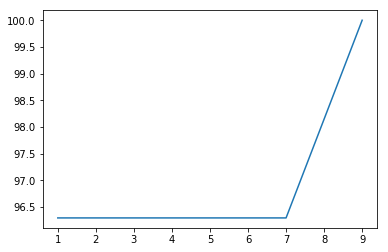

In [334]:
k = [1,3,5,7,9]
for i in range(1, 10, 2):
    prediction(training_data,testing_data,i,eucli_dist)  

plt.plot(k,value)
plt.show()

#### b) Manhatten Distance

K =  1  Accuracy  96.29629629629629 %
K =  3  Accuracy  96.29629629629629 %
K =  5  Accuracy  92.5925925925926 %
K =  7  Accuracy  92.5925925925926 %
K =  9  Accuracy  96.29629629629629 %


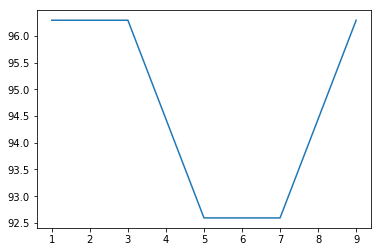

In [335]:
k = [1,3,5,7,9]
value=[]
for i in range(1, 10, 2):
    prediction(training_data,testing_data,i,manhatten)  

plt.plot(k,value)
plt.show()

#### c) Cosine Similarity

K =  1  Accuracy  96.29629629629629 %
K =  3  Accuracy  92.5925925925926 %
K =  5  Accuracy  92.5925925925926 %
K =  7  Accuracy  92.5925925925926 %
K =  9  Accuracy  92.5925925925926 %


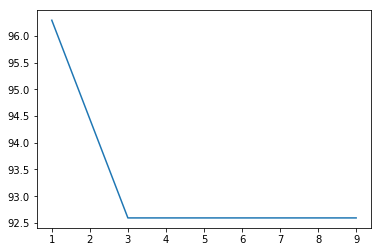

In [336]:
k = [1,3,5,7,9]
value=[]
for i in range(1, 10, 2):
    prediction(training_data,testing_data,i,cosine_distance)  

plt.plot(k,value)
plt.show()

#### d)Chebyshev distance

K =  1  Accuracy  96.29629629629629 %
K =  3  Accuracy  96.29629629629629 %
K =  5  Accuracy  96.29629629629629 %
K =  7  Accuracy  100.0 %
K =  9  Accuracy  100.0 %


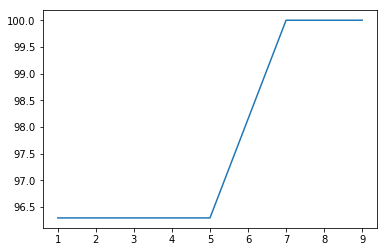

In [337]:
k = [1,3,5,7,9]
value=[]
for i in range(1, 10, 2):
    prediction(training_data,testing_data,i,Chebychev)  

plt.plot(k,value)
plt.show()

### KNN algorithm on Robot Datasets

In [338]:
# robo1=pd.read_csv("Data/RobotDataset/Robot1"),names=['ap','class','a1','a2','a3','a4','a5','a6','Id'],delimiter=" ")
# robo1.head()
robo1 = pd.read_csv("Data/RobotDataset/Robot1", delimiter=" ")
robo1.columns =['ap','class','a1','a2','a3','a4','a5','a6','Id']

robo1 = pd.DataFrame(robo1, columns = ['ap','a1','a2','a3','a4','a5','a6','Id','class'])

robo1.head()

,ap,a1,a2,a3,a4,a5,a6,Id,class
0,NaN,1,1,1,1,3,2,data_6,1
1,NaN,1,1,1,3,2,1,data_19,1
2,NaN,1,1,1,3,3,2,data_22,1
3,NaN,1,1,2,1,2,1,data_27,1
4,NaN,1,1,2,1,2,2,data_28,1


In [339]:
robo1.drop('Id',axis=1,inplace=True)
robo1.drop('ap',axis=1,inplace=True)
robo1.head()

,a1,a2,a3,a4,a5,a6,class
0,1,1,1,1,3,2,1
1,1,1,1,3,2,1,1
2,1,1,1,3,3,2,1
3,1,1,2,1,2,1,1
4,1,1,2,1,2,2,1


In [340]:
split = int(0.8 * robo1.shape[0])
training_Robo1data = robo1[:split] # 80% of the total data
testing_Robo1data = robo1[split:]  # 20% of the total data

#### a) Euclidean Distance

K =  1  Accuracy  56.00000000000001 %
K =  3  Accuracy  76.0 %
K =  5  Accuracy  76.0 %
K =  7  Accuracy  84.0 %


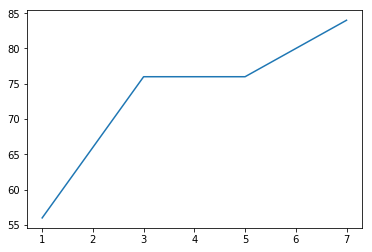

In [341]:
value=[]
k = [1,3,5,7]
for i in range(1, 8, 2):
    prediction(training_Robo1data,testing_Robo1data,i,eucli_dist)  

plt.plot(k,value)
plt.show()

#### b) Manhatten distance

K =  1  Accuracy  48.0 %
K =  3  Accuracy  52.0 %
K =  5  Accuracy  56.00000000000001 %
K =  7  Accuracy  56.00000000000001 %


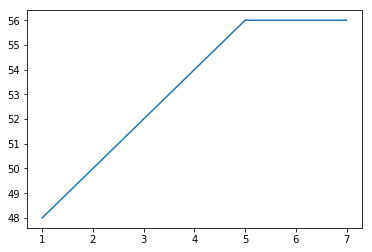

In [342]:
value=[]
k = [1,3,5,7]
for i in range(1, 8, 2):
    prediction(training_Robo1data,testing_Robo1data,i,manhatten)  

plt.plot(k,value)
plt.show()

#### c) Chebychev Distance

K =  1  Accuracy  96.0 %
K =  3  Accuracy  96.0 %
K =  5  Accuracy  96.0 %
K =  7  Accuracy  100.0 %


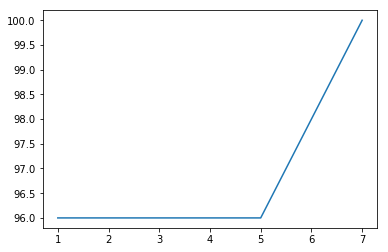

In [343]:
value=[]
k = [1,3,5,7]
for i in range(1, 8, 2):
    prediction(training_Robo1data,testing_Robo1data,i,Chebychev)  

plt.plot(k,value)
plt.show()

#### d)Cosine Similarity

K =  1  Accuracy  84.0 %
K =  3  Accuracy  88.0 %
K =  5  Accuracy  88.0 %
K =  7  Accuracy  88.0 %


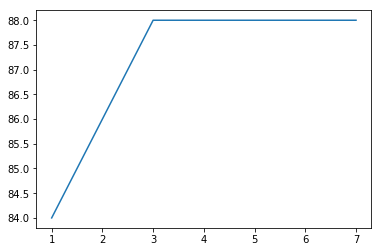

In [345]:
value=[]
k = [1,3,5,7]
for i in range(1, 8, 2):
    prediction(training_Robo1data,testing_Robo1data,i,cosine_distance)  

plt.plot(k,value)
plt.show()

### KNN on Robot2 dataset

In [346]:
robo2 = pd.read_csv("Data/RobotDataset/Robot2", delimiter=" ")
robo2.columns =['ap','class','a1','a2','a3','a4','a5','a6','Id']
robo2 = pd.DataFrame(robo2, columns = ['ap','a1','a2','a3','a4','a5','a6','Id','class'])
robo2.head()

,ap,a1,a2,a3,a4,a5,a6,Id,class
0,NaN,1,1,1,1,2,1,data_3,1
1,NaN,1,1,1,1,2,2,data_4,1
2,NaN,1,1,1,1,3,1,data_5,0
3,NaN,1,1,1,1,4,1,data_7,0
4,NaN,1,1,1,2,1,1,data_9,1


In [347]:
robo2.drop('Id',axis=1,inplace=True)
robo2.drop('ap',axis=1,inplace=True)
robo2.head()

,a1,a2,a3,a4,a5,a6,class
0,1,1,1,1,2,1,1
1,1,1,1,1,2,2,1
2,1,1,1,1,3,1,0
3,1,1,1,1,4,1,0
4,1,1,1,2,1,1,1


In [348]:
split = int(0.8 * robo2.shape[0])
training_Robo2data = robo2[:split] # 80% of the total data
testing_Robo2data = robo2[split:]  # 20% of the total data

#### a) Euclidean Distance

K =  1  Accuracy  80.0 %
K =  3  Accuracy  92.0 %
K =  5  Accuracy  88.0 %
K =  7  Accuracy  92.0 %


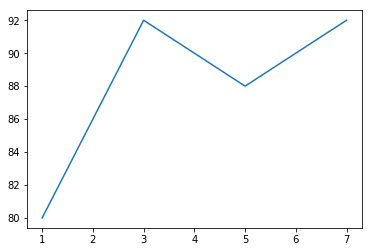

In [349]:
value=[]
k = [1,3,5,7]
for i in range(1, 8, 2):
    prediction(training_Robo2data,testing_Robo2data,i,eucli_dist)  

plt.plot(k,value)
plt.show()

#### b) Cosine Similarity

K =  1  Accuracy  80.0 %
K =  3  Accuracy  80.0 %
K =  5  Accuracy  84.0 %
K =  7  Accuracy  76.0 %


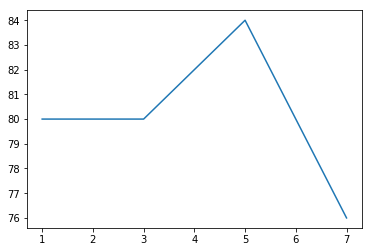

In [350]:
value=[]
k = [1,3,5,7]
for i in range(1, 8, 2):
    prediction(training_Robo2data,testing_Robo2data,i,cosine_distance)  

plt.plot(k,value)
plt.show()

#### c) Chebychev Distance


K =  1  Accuracy  52.0 %
K =  3  Accuracy  60.0 %
K =  5  Accuracy  60.0 %
K =  7  Accuracy  68.0 %


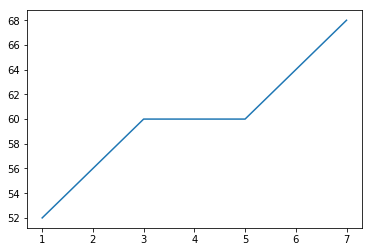

In [351]:
value=[]
k = [1,3,5,7]
for i in range(1, 8, 2):
    prediction(training_Robo2data,testing_Robo2data,i,Chebychev)  

plt.plot(k,value)
plt.show()

#### d) Manhatten distance

K =  1  Accuracy  84.0 %
K =  3  Accuracy  88.0 %
K =  5  Accuracy  84.0 %
K =  7  Accuracy  88.0 %


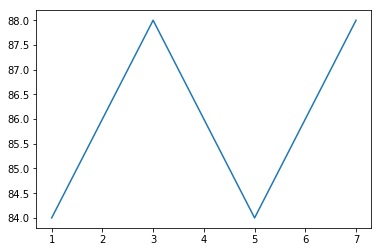

In [352]:
value=[]
k = [1,3,5,7]
for i in range(1, 8, 2):
    prediction(training_Robo2data,testing_Robo2data,i,manhatten)  

plt.plot(k,value)
plt.show()

#### TestFile

In [321]:
import sys
s=str(sys.argv[1])
if s=="Robot1":
    testFile = pd.read_csv(str(sys.argv[2]), delimiter=" ")
    testFile.columns =['ap','class','a1','a2','a3','a4','a5','a6','Id']
    testFile = pd.DataFrame(testFile, columns = ['ap','a1','a2','a3','a4','a5','a6','Id','class'])
    testFile.drop('Id',axis=1,inplace=True)
    testFile.drop('ap',axis=1,inplace=True)

    value=[]#empty list
    predictionForTestFile(training_Robo1data,testFile,5,eucli_dist) 

    print(value)
elif s=="Robot2":
    testFile = pd.read_csv(str(sys.argv[2]), delimiter=" ")
    testFile.columns =['ap','class','a1','a2','a3','a4','a5','a6','Id']
    testFile = pd.DataFrame(testFile, columns = ['ap','a1','a2','a3','a4','a5','a6','Id','class'])
    testFile.drop('Id',axis=1,inplace=True)
    testFile.drop('ap',axis=1,inplace=True)

    value=[]#empty list
    predictionForTestFile(training_Robo2data,testFile,5,eucli_dist)
else:
    testFile=pd.read_csv(str(sys.argv[2]),names=['sepalLen','sepalWid','petalLen','petalWid','class'])
    value=[]#empty list
    predictionForTestFile(training_data,testFile,3,eucli_dist) 

    print(value)